# **Universidad de Monterrey**  
## **Tarea 2: Regresión Lineal Simple usando TensorFlow en Python**  

### **Estudiantes:**  
- **Carlos Emilio Cantú Magaña**  (#595704)  
- **José Antonio Sánchez Benito** (#635049)  

### **Programa Académico:**  
- **Ingeniería Mecatrónica**  
- **Ingeniería Robótica y Sistemas Inteligentes**  

### **Profesor:**  
**Andrés Hernández Gutiérrez**  

### **Semestre:**  
**Primavera 2025**  

### **Fecha:**  
**29 de enero del 2025**  


1. Importanción de librerías

La primera parte del codigo consiste en importar nuestras librerías, al programa en python es recomendable colocarlas al inicio de nuestro Jupyter Notebook o del script de Python.

En la siguiente celda se encuentran las celdas utilizadas:
* numpy: Se usa para la creación de vectores y realizar operaciones matematicas.
* tensorflow: Se utiliza para diseñar, entrenar , validar y probar el desarrollo de una red neuronal de una sola neurona.
* matplotip: Se usa con fines de visualización, esto puede ser, para graficar curvas de apredizaje y evaluar el proceso de entrenamiento.
* sklearn.model_selection: Esta biblioteca proporciona el método train_test_split, que permite dividir el conjunto de datos inicial en conjuntos de entrenamiento y validación.
*time: Es un módulo estandar de python, por lo que no es necesario instalarlo externamente y esta permite trabajar con el tiempo en python. Particularmente la usamos para determinar el tiempo en segundos que tarda nuestro proceso de entrenamiento, haciendo uso del metodo time().

In [ ]:
# 1. Import standard libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

2. Plantado de semilla para la reproducibilidad de los datos

np.random.seed(num) de la biblioteca NumPy establece una semilla para el generador de números aleatorios de Python. Garantiza que cualquier secuencia de números pseudoaleatorios generada sea reproducible. Esto significa que, al ejecutar el código nuevamente con la misma semilla, se obtendrán los mismos resultados.

Lo interesante es que parte de la premisa de que, dentro de las máquinas, no existen números aleatorios, sino que, al darle una entrada, un algoritmo genera una serie de números predeterminados. Entonces, el seed siempre proporciona la misma entrada (4500), impidiendo que los números se alteren en cada iteración. (2024b, febrero 9)


In [ ]:
# 2. Seed for reproducibility
np.random.seed(4500)


3.- Generación de datos sinteticos

` np.arange(0, 100, 1)` genera un arreglo de valores igualmente espaciados, comenzando en 0, hasta 99 (el límite superior 100 no está incluido), con un paso de 1 y será la variable independiente de los datos sintéticos.

 `noise_mean:` Media del ruido generado. En este caso, es 0.

 `noise_std:` Desviación estándar del ruido. Aquí es 5, lo que indica la cantidad de variabilidad aleatoria que se agregará a los datos.

`true_coeffs[1 3] ` es la intersección con el eje y (1). Representa la pendiente de la línea (3).

Se genera el valor de y como una combinación lineal:

*       true_coeffs[1]*x: Multiplica cada valor de x por la pendiente (3).
*   true_coeffs[0]: Suma la intersección (1).
*   np.random.normal(loc=noise_mean, scale=noise_std, size=len(x)): Añade ruido aleatorio a cada punto y. Este ruido se genera siguiendo una distribución normal con media 0 y desviación estándar 5.




    
    




In [ ]:
# 3. Generate synthetic data
x = np.arange(0,100, 1)
noise_mean, noise_std = 0, 5
true_coeffs = [1, 3]
y = true_coeffs[1]*x + true_coeffs[0] + np.random.normal(loc=noise_mean, scale=noise_std, size=len(x))

4. Visualización de los datos

Una vez generados los datos sintéticos, en la siguiente celda lo que se realiza es la visualización de los datos. Esto es posible debido a que tenemos dos variables, x y y, que podemos visualizar en el plano cartesiano.

Para esto, usamos métodos de la librería matplotlib, utilizando los siguientes métodos:

* figure(figsize=(num1, num2)): Indica las dimensiones del cuadro.
* scatter(x, y, label='nombre de la leyenda'): Dibuja los puntos en la gráfica, tanto de los valores en el eje x como en el eje y.
* xlabel y ylabel: Estos métodos nombran las variables correspondientes a cada eje, usando sintaxis de LaTeX y fontsize para el tamaño de las letras.
* title: Utiliza LaTeX para la sintaxis del título.
* legend: Muestra la leyenda nombrada en el label del método scatter.
* show: Muestra la gráfica en cualquier entorno. Si se elimina, en Colab aún se puede visualizar.


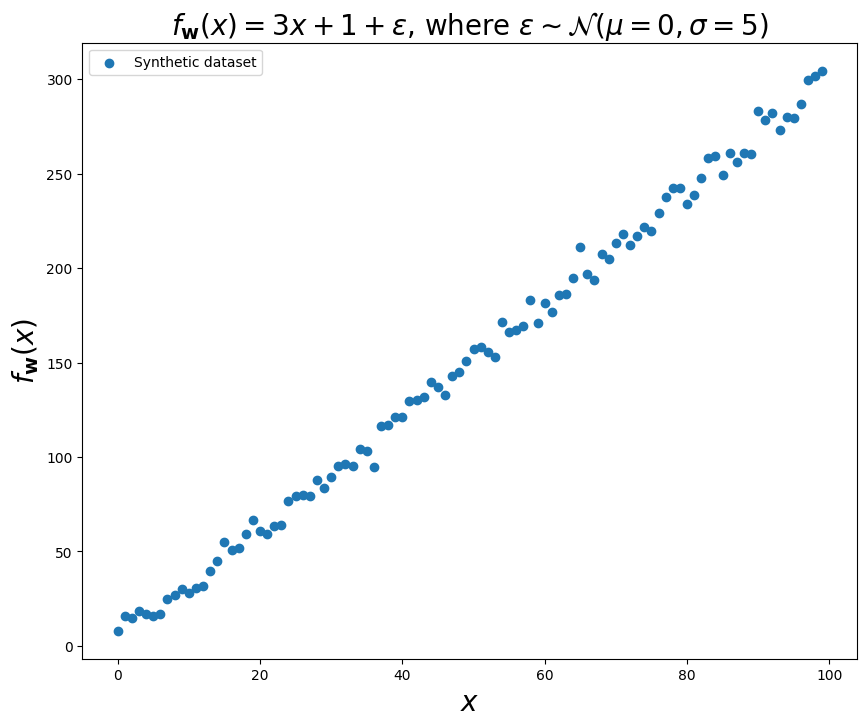

In [ ]:
# 4. Visualise the generated synthetic dataset
plt.figure(figsize=(10,8))
plt.scatter(x, y, label='Synthetic dataset')
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[1]} x + {true_coeffs[0]} + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

5. División de los datos en conjuntos de entrenamiento y prueba:

La función train_test_split se utiliza para dividir el conjunto de datos en dos partes:
`Conjunto de entrenamiento`: Contiene el 80% de los datos y se utiliza para entrenar el modelo de aprendizaje automático.

`Conjunto de prueba`: Contiene el 20% de los datos y se utiliza para evaluar el rendimiento del modelo.


Parámetros:

`test_size`=0.2: Asigna el 20% de los datos al conjunto de prueba.

`random_state=42`: Garantiza la reproducibilidad de la división al fijar la semilla aleatoria. (Se utiliza el 42 por convención)

`shuffle=True`: Mezcla los datos aleatoriamente antes de dividirlos, para evitar sesgos.

Salida:

x_train y y_train: Conjunto de entrenamiento en x e y.

x_test y y_test: Conjunto de prueba en x e y.


In [ ]:
# 5. Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

6. Visualización de datos

Una vez generado la separación de datos en train y test, en la siguiente celda se muestra la representación grafica de los datos de train en color rojo y los datos de test en color azul.

Al igual que en el punto 4 se utilizan los metodos de la librería de matplotlib, solo que ahora se usa el metodo scatter en dos ocaciones, una para definir los valores de testing y en otra para definir los valores de training, con distintos colores. Con el metodo legend se muestran las leyendas, correspondientes.

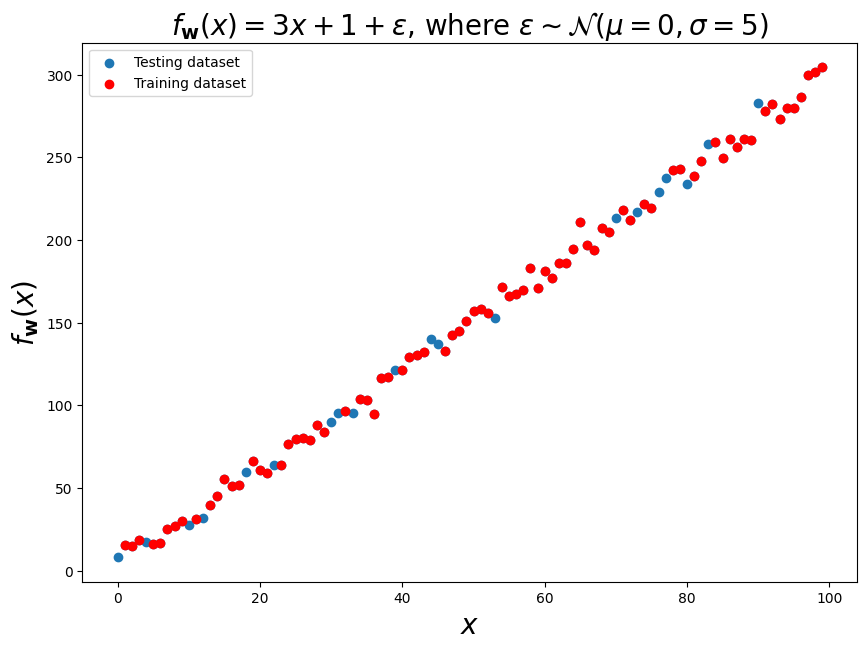

In [ ]:
# 6. Visualise the generated train and test synthetic dat sets
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[1]} x + {true_coeffs[0]} + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

7. Construcción del modelo

Se crea un modelo secuencial ntf.keras.Sequential.

Capas:
`Input(shape=(1,))`: Dicta que el modelo tendrá una sola entrada, es decir una sola variable de entrada, la independiente.

`Dense(1)`: Agrega una neurona densa que calculará la salida, ajustando la pendiente (weights) y la intersección (bias) para predecir la variable dependiente (y).

Se construye un modelo de regresión linear simple, con tensorflow, buscando crear la línea de mejor ajuste.

In [ ]:
# 7. Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
    ])

8. Copilar el modelo

En este paso, una vez cubierto la estructura de nuestra red neuronal, necesitamos configurar nuestro proceso de aprendizaje, es aquí dónde entra el concepto optimizador, tasa de apredizaje,  función de perdida.

La variable opt, de la primera linea guarda el optimizador, que es el que va a estar ajustando los pesos de la red neuronal, para minimizar la función de pérdida y mejorar su rendimiento.

El optimizador que se usa es "Adam" el cual es uno de los optimizadores más utilizados, ya que tiene una convergencia más rapida, menos necesidad de un ajuste manual de la tasa de aprendizaje y funciona muy bien con escasos datos.(Crooks, 2024)

Por otro lado el learning_rate, es que que nos indicara el tamaño de los pasos que da el optimizador al actualizar los pesos de la red.

En la segunda línea con model.compile() se definen cómo se actualizanrán los pesos durante el entrenamiento, definiendo el optimizador (optimizer=opt) y la función de perdida (loss="mse") dónde utilizamos el error cuadratico medio, esto quiere decir que calculamos el promedio de los errores cuadrados entre las predicciónes y los valores reales. Es interesante mencionar que model.compile tambien tiene parametros para la ejecución ansiosa o eager execution.




In [ ]:
# 8. Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.1)# creación de un optimizador
model.compile(optimizer=opt, loss='mse') #compilación del modelo

9. EarlyStopping callback

Se usa el EarlyStopping para optimizar el entrenamiento, si no mejora después de cierto tiempo (6 épocas) definido en los parámetros, el modelo terminará su entrenamiento inmediatamente.

`(patience=6)`: Tolerancia de épocas

`Val_loss`: la pérdida en los datos de validación

Tiene como objetivo principal evitar el sobreajuste


In [ ]:
# 9. Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=6, verbose=1)

10. Entrenamiento de modelo.

En esta celda, despues de realizar todas las configuraciones para el modelo se realiza el entrenamiento de nuestra neurona. Primero, se guarda el tiempo de inicio con time.time(), y luego se entrena el modelo con los datos x_train y y_train. El entrenamiento está configurado para 3000 épocas, usando lotes de 5 muestras a la vez y reservando un 10% de los datos para evaluar el rendimiento en cada iteración. Además, el argumento verbose=1 permite ver el progreso en la consola, mientras que early_stopping actúa como un freno de emergencia, deteniendo el entrenamiento si el modelo deja de mejorar, evitando desperdiciar tiempo y recursos.

Cuando el entrenamiento termina, el código calcula el tiempo total transcurrido y lo muestra en pantalla.

Descripción por función:

- `start_time = time.time()`: Guarda el tiempo de inicio de ejecución.
- `model.fit(...)`: Entrena el modelo con los datos de entrenamiento.
- `epochs=3000`: Define 3000 iteraciones de entrenamiento.
- `batch_size=5`: Usa lotes de 5 muestras por actualización.
- `validation_split=0.10`: Separa el 10% de los datos para validación.
- `verbose=1`: Muestra el progreso del entrenamiento.
- `callbacks=[early_stopping]`: Detiene el entrenamiento si no hay mejora.
- `print(f"\nElapsed time: {time.time() - start_time} sec")`: Muestra el tiempo total de ejecución.


In [ ]:
# 10. Train the model
start_time = time.time()
model.fit(x_train, y_train, epochs=3000, batch_size=5, validation_split=0.10, verbose=1, callbacks=[early_stopping])
print(f"\nElapsed time: {time.time() - start_time} sec")

Epoch 1/3000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 13507.8857 - val_loss: 4132.8296
Epoch 2/3000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1701.1467 - val_loss: 5.9431
Epoch 3/3000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85.7769 - val_loss: 149.3010
Epoch 4/3000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 139.2445 - val_loss: 2.9461
Epoch 5/3000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.1237 - val_loss: 38.6903
Epoch 6/3000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.5119 - val_loss: 16.7531
Epoch 7/3000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.7082 - val_loss: 6.8163
Epoch 8/3000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.1317 - val_loss: 10.3867
Epoch 9/3000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.4783 - val_loss: 10.5325
Epoch 10/3000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.3545 - val_loss: 9.2855
Epoch 10: early stopping

Elapsed time: 2.73345947265625 sec


11. Evaluar el modelo

`model.evaluate(x_test, y_test)`: Mide el error del modelo en los datos de prueba.

`(loss)`: la diferencia entre las predicciones del modelo y los valores reales de y_test.

A menor valor de Loss, mejor rendimiento del modelo en los datos de prueba

In [ ]:
# 11. Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 29.4691

Test Loss: 29.46905517578125


12. Impresión de los pesos del modelo a entrenar.

En la siguiente parte, se observan los pesos que el modelo ha aprendido después del entrenamiento. Primero, se extraen los valores con model.layers[0].get_weights(), lo que básicamente nos proporciona dos elementos: los pesos de las conexiones (weights[0]), que indican qué tan importante es cada entrada para la predicción, y el sesgo (weights[1]), que ayuda a ajustar la salida del modelo.

Después, se imprimen los valores y se analizan los resultados del modelo. Aquí se puede interpretar que w1 representa la pendiente de nuestra función, acercándose mucho a la función original. En el caso de w0, se interpreta como la intersección en el eje y de nuestra función. Sin embargo, en este punto, w0 no es tan cercano a la intersección de la función original, lo que señala un área de oportunidad para mejorar la configuración de la red neuronal.

In [ ]:
# 12. Print the weights of the trained model
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Bias [w0]: {weights[1]}")

Weights [w1]: [[2.9789891]]
Bias [w0]: [2.4287302]


13. Generación de predicciones con el modelo entrenado:

`model.predict(x_test)`: Obtiene los valores predichos de la variable dependiente (y) en el conjunto de prueba.

Las predicciones de y_pred_test pueden compararse con los valores y_test (Que son los reales) para evaluar el desempeño del modelo.


In [ ]:
# 13. Make predictions
y_pred_test = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


14. Visualización de los resultados del modelo:

`plt.figure(figsize=(10, 7)) `código insertado`:Crea una figura con un tamaño de 10x7 pulgadas para una mejor visualización.

`plt.scatter(x_train, y_train, label='Training data') `: Genera un gráfico de dispersión con los datos de entrenamiento.
Permite visualizar la distribución de los datos originales.

`plt.plot(x_test, y_pred_test, label='Model', linewidth=3, color=[1,0,0])` Dibuja la línea de regresión ajustada por el modelo; de color rojo y de grosor 3 para poder identificarla.


`plt.xlabel(r'$x$', fontsize=20)`: Etiqueta del eje x

`plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)`: Etiqueta del eje, usa la notación de la función del modelo.

`plt.legend()`: Agrega una leyenda para identificar los datos de entrenamiento y la línea del modelo.

`plt.show()`: Muestra la gráfica final con todos los elementos.

1.   Gráfica de dispersión con los datos de entrenamiento para observar su
 lista distribución.

2.   Se superpone la línea del modelo ajustado, mostrando cómo la regresión lineal se ajusta a los datos de prueba.

3.  La comparación visual entre los datos reales y la línea predicha permite evaluar la calidad del modelo.

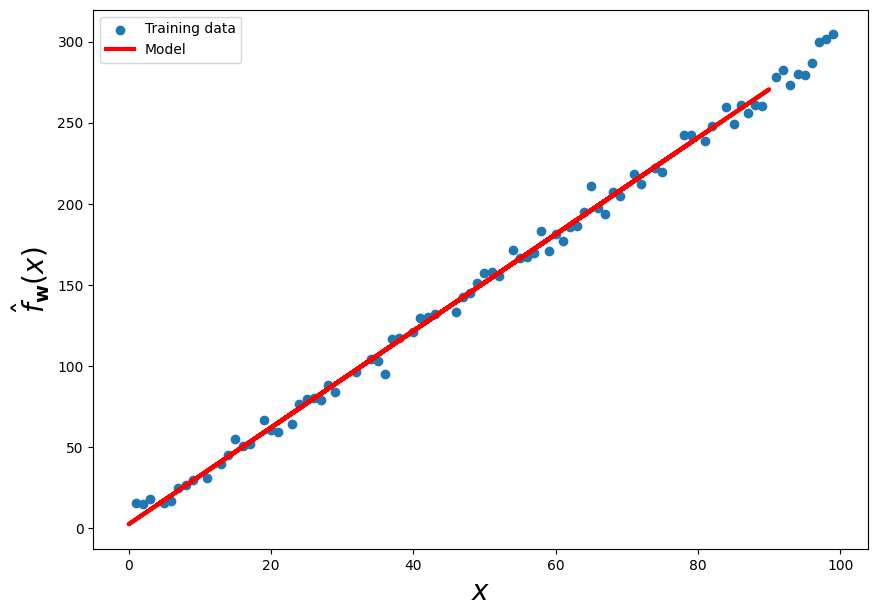

In [ ]:
# 14. Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_test, y_pred_test, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)
plt.legend()
plt.show()

##Conclusiones

José Antonio Sánchez Benito

En el desarrollo de esta actividad, la verdad es que me intrigaron varias cosas que creo que estaremos viendo a lo largo de la materia, pero en las que, al inicio, no había mostrado tanto interés durante el curso de Inteligencia Artificial I. Sin embargo, disfruto mucho la parte teórica y profundizar en el funcionamiento de una red neuronal.

La parte que considero más interesante es la estructura que debe tener una red neuronal. En este caso, está creada con una sola capa y una sola neurona, lo que nos da como salida una función lineal. Anteriormente, habíamos visto regresiones lineales con métodos numéricos; comprender cómo este procedimiento es posible mediante el uso de redes neuronales es el principal aprendizaje que me llevo.

Asimismo, entiendo que, por tratarse de una regresión lineal, no es necesario utilizar una función de activación. Sin embargo, sería interesante emplear funciones como ReLU para lograr un mejor ajuste a los datos, ya que la principal deficiencia que se observa está en la intersección de la función. Otra parte que me interesó al investigar el funcionamiento de las funciones es el tipo de optimizador a utilizar. En este caso, usamos el optimizador Adam, el cual combina las ventajas de dos optimizadores, ofreciendo una gran cantidad de beneficios.

Me gustaría seguir profundizando en estas características, tanto en su funcionamiento como en su selección, en función de las necesidades de las bases de datos y del uso que se les quiera dar a la información.




Carlos Emilio Cantu Magaña

Esta actividad me ayudó bastante para recordar conceptos de la materia inteligencia artificial 1, pero con un enfoque más aterrizado en el sentido de que ahora utilizamos más TensoFlow, si bien sí lo llegamos a utilizar en la materia anterior mediante este desglose pude terminar de comprender 2 o 3 conceptos que no entendía muy bien o no estaban muy aterrizados en mi cabeza, considero que utilizar una red neuronal para una regresión lineal puede ser esencialmente útil cuando los volúmenes de datos son bastante grandes; Realmente este tipo de herramientas pueden repercutir de una manera bastante significativa y sobre todo positiva en estos campos de la ingeniería, personalmente esta es una de las áreas en las que me gustaría realizar algún tipo de especialización o maestría y considero que este tipo de procesos o sistemas de control con inteligencia artificial serán fundamentales para el futuro, por ello quisiera comprometerme conmigo mismo para poder seguir aprendiendo acerca de arquitecturas de redes neuronales más avanzadas y sobre todo seguir experimentando todo lo que se pueda con TensoFlow, la aplicabilidad de este tipo de arquitecturas es verdaderamente impresionante y amplia para los días venideros

##Bibliografía

* Ebner, J. (2024b, febrero 9). Numpy random seed, explained - sharp sight. Sharp Sight. https://www.sharpsightlabs.com/blog/numpy-random-seed/
* The NumPy Community. (n.d.). NumPy: The fundamental package for scientific computing with Python. NumPy. Retrieved January 29, 2025, from https://numpy.org/doc/
* Crooks, R. (2024, 29 agosto). Adam Optimizer PyTorch con ejemplos. PythonGuía. https://pythonguia.com/adam-optimizer-pytorch-con-ejemplos/

* What does model.compile() do in keras tensorflow? (s. f.). Stack Overflow. https://stackoverflow.com/questions/63493324/what-does-model-compile-do-in-keras-tensorflow




